In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import altair as alt
import plotly.express as px
import plotly.io as pio
import geopandas as gpd
import folium
pio.renderers.default='plotly_mimetype+notebook_connected'
import warnings
warnings.filterwarnings('ignore')

In [39]:
gdf = gpd.read_file("data/mapUSmain.geojson")
att = pd.read_csv("data/crime.csv")
att.head()

,Geo_FIPS,Geo_Name,Geo_QName,SE_T003_001,SE_T003_002,SE_T003_003,SE_T005_001,SE_T005_002,SE_T005_003,SE_T005_004,...,SE_NV008_034,SE_NV008_035,SE_NV008_036,SE_NV008_037,SE_NV008_038,SE_NV008_039,SE_NV008_040,SE_NV008_041,SE_NV008_042,SE_NV008_043
0,1,Alabama,Alabama,3485.891074,414.486232,3071.404842,414.486232,5.567726,39.902033,94.527606,...,0.123727,0.309318,2.392060,0.680500,3.175666,0.000000,10.558057,0.0,0.000000,0.000000
1,4,Arizona,Arizona,3504.724961,384.729430,3119.995531,384.729430,4.530947,47.181275,91.747971,...,3.624758,3.416780,41.536161,0.000000,24.704805,0.668500,54.549636,0.0,22.209070,38.594759
2,5,Arkansas,Arkansas,3579.965945,452.876901,3127.089044,452.876901,5.596067,56.837164,63.950237,...,0.101134,2.292365,9.742551,3.236280,20.833551,0.000000,62.972611,0.0,7.821009,10.383064
3,6,California,California,2831.258295,390.603698,2440.654597,390.603698,4.381161,24.222666,125.440371,...,0.012886,1.360737,5.662006,3.999742,7.679918,0.445848,40.961278,0.0,8.342246,7.945364
4,8,Colorado,Colorado,2810.805946,304.712627,2506.093319,304.712627,2.763325,56.946906,56.480129,...,1.064254,4.742464,37.734327,0.970898,42.850213,0.000000,140.780221,0.0,30.433920,60.289036


In [41]:
polys = gdf.copy()
g = pd.merge(polys, att, left_on='NAME', right_on='Geo_Name', how='left')
g=g[g["NAME"]!="District of Columbia"]

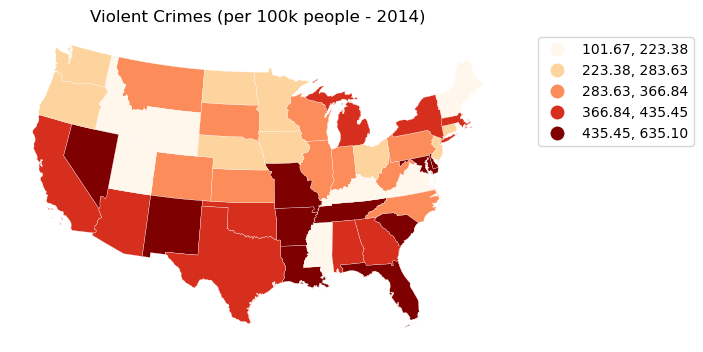

In [43]:
g = g.to_crs("ESRI:102003")
g["Violent Crimes (per 100k people)"] = g["SE_T005_001"]

ax = g.plot(column="Violent Crimes (per 100k people)", cmap="OrRd", scheme="Quantiles", k=5, legend=True, legend_kwds= dict(loc='upper left', bbox_to_anchor=(1.05, 1)), edgecolor="white", linewidth=0.2)
ax.set_title("Violent Crimes (per 100k people - 2014)")
ax.set_axis_off()

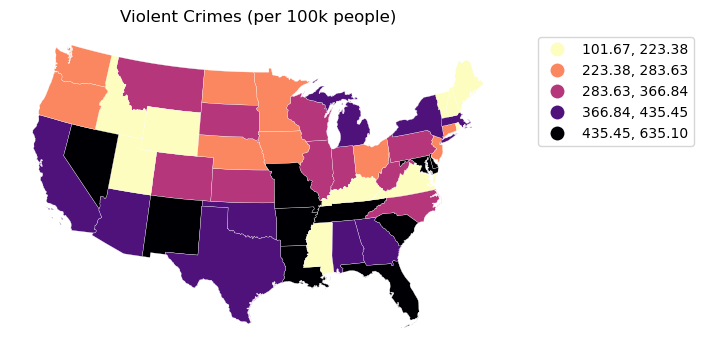

In [37]:
g = g.to_crs("ESRI:102003")
g["Violent Crimes (per 100k people)"] = g["SE_T005_001"]

ax = g.plot(column="Violent Crimes (per 100k people)", cmap="magma_r", scheme="Quantiles", k=5, legend=True, legend_kwds= dict(loc='upper left', bbox_to_anchor=(1.05, 1)), edgecolor="white", linewidth=0.2)
ax.set_title("Violent Crimes (per 100k people)")
ax.set_axis_off()

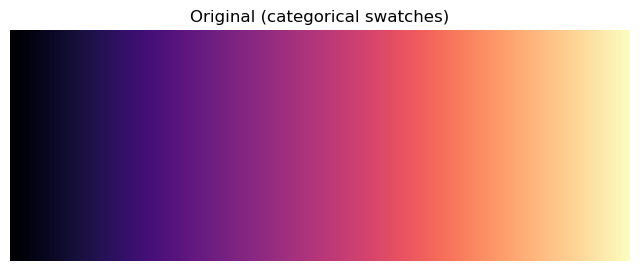

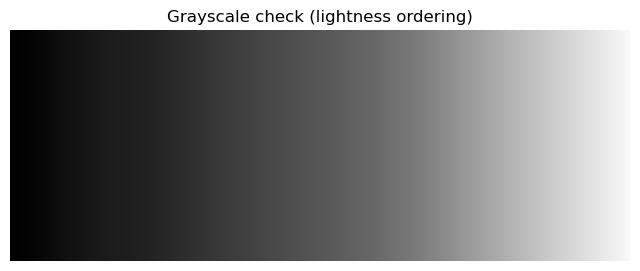

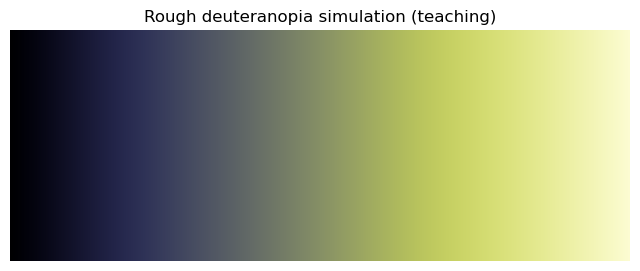

In [71]:
def to_grayscale(rgb_image):
    # rgb_image: (H,W,3) floats 0..1
    r, g, b = rgb_image[...,0], rgb_image[...,1], rgb_image[...,2]
    gray = 0.2126*r + 0.7152*g + 0.0722*b
    return np.dstack([gray, gray, gray])

def simulate_deuteranopia(rgb):
    M = np.array([[0.625, 0.375, 0.000],
                  [0.700, 0.300, 0.000],
                  [0.000, 0.300, 0.700]])
    shp = rgb.shape
    flat = rgb.reshape(-1,3)
    sim = flat @ M.T
    sim = np.clip(sim, 0, 1)
    return sim.reshape(shp)

x = np.linspace(0,1,256)
bar = np.tile(x, (30,1))
img = plt.cm.magma(np.linspace(0, 1, 256))[:, :3]
img = np.tile(img, (30, 1, 1))

plt.figure(figsize=(8,3))
plt.imshow(img, aspect='auto')
plt.title("Original (categorical swatches)")
plt.axis('off')
plt.show()

plt.figure(figsize=(8,3))
plt.imshow(to_grayscale(img), aspect='auto')
plt.title("Grayscale check (lightness ordering)")
plt.axis('off')
plt.show()

plt.figure(figsize=(8,3))
plt.imshow(simulate_deuteranopia(img), aspect='auto')
plt.title("Rough deuteranopia simulation (teaching)")
plt.axis('off')
plt.show()

I decided to fix up a visualization from last week's assignment since the color scheme had the most impact out of all the other graphs I have produced. I wanted to increase readiability as the white shade from the original graph makes it difficult to differentiate some states. The new color scheme is very easy to interpret, and by using '_r" at the end of 'cmap=magma_r', I was able to assign lighter colors to low crime states and darker colors to high crime states. Overall, the change in color scheme was a pleasant benefit, and I will definetly be more considerate when deciding what color scheme to use.